In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Loading Essential libraries 
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False # this to force autocompletion 

In [4]:
df = pd.read_csv('../datasets/SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.shape

(5572, 2)

In [5]:
# convert label to a numerical variable
df['Category'] = df.Category.map({'ham':0, 'spam':1})
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### lets do some plotting 


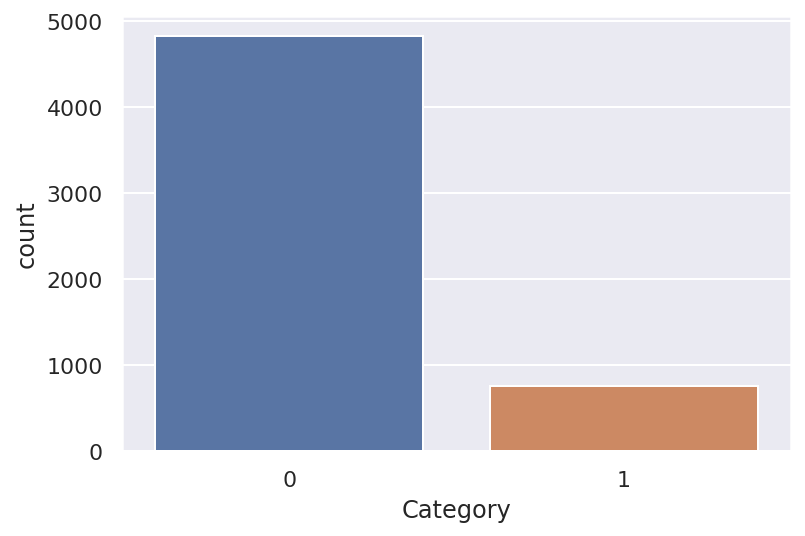

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.countplot(df.Category)
plt.show()

In [6]:
df['word_length'] = df['Message'].apply(lambda x:len(x.split()))

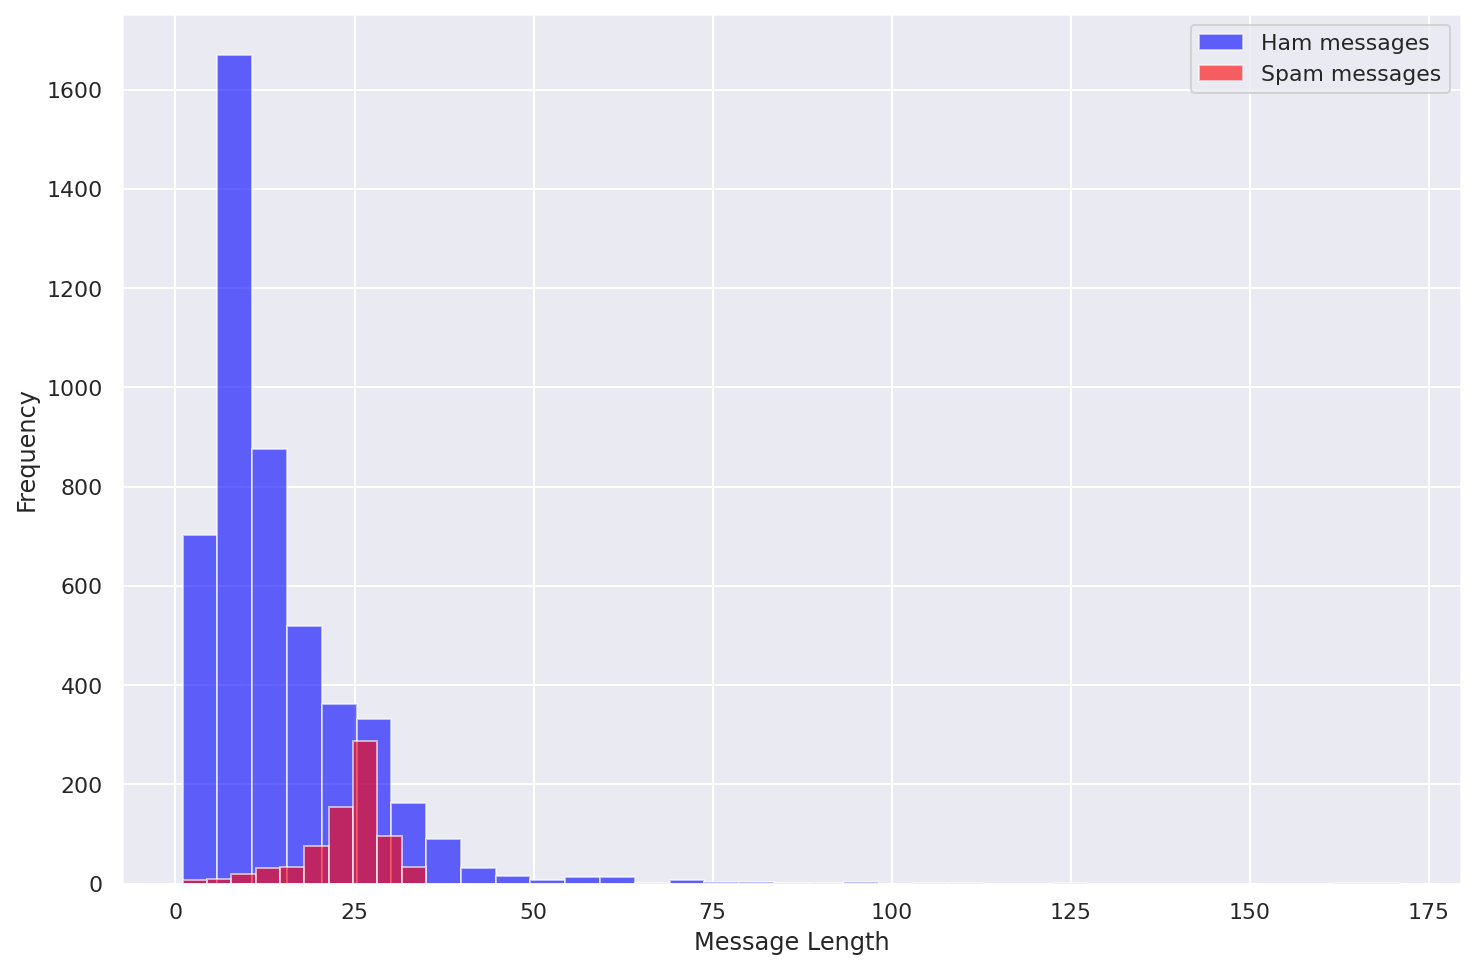

In [9]:
plt.figure(figsize=(12, 8))

df[df.Category==0].word_length.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
df[df.Category == 1].word_length.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")
plt.show()

In [10]:
df.groupby('Category').mean()

,word_length
Category,
0,14.310259
1,23.812584


In [11]:
# describing the hame(normal msgs )
df[df.Category == 0].describe()

,Category,word_length
count,4825.0,4825.000000
mean,0.0,14.310259
std,0.0,11.517945
min,0.0,1.000000
25%,0.0,7.000000
50%,0.0,11.000000
75%,0.0,19.000000
max,0.0,171.000000


In [12]:
# Describing  the spam msgs
df[df.Category == 1].describe()

,Category,word_length
count,747.0,747.000000
mean,1.0,23.812584
std,0.0,5.956923
min,1.0,1.000000
25%,1.0,22.000000
50%,1.0,25.000000
75%,1.0,28.000000
max,1.0,35.000000


**From here we can say that the longer text are more probable to become Spam msgs**

### now let do some text_preprocessing

In [9]:
#!pip install text-hammer
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension
#!pip install lxml

In [7]:
import text_hammer as th

2022-07-28 00:05:58.145060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 00:05:58.154993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 00:05:58.155152: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [8]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
  
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 1.17 ms, sys: 0 ns, total: 1.17 ms
Wall time: 898 µs


In [9]:
cleaned_df = text_preprocessing(df, "Message")

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

  0%|          | 0/5572 [00:00<?, ?it/s]

In [10]:
cleaned_df.Message

0       jurong point crazy available bugis great world...
1                                   ok lar joking wif oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                                     dun early hor c say
4                                   nah think go usf life
                              ...                        
5567    2nd time try 2 contact you win 750 pound prize...
5568                             u b go esplanade fr home
5569                      pity mood that soany suggestion
5570    guy bitching act like interested buying week g...
5571                                roll floor laugh true
Name: Message, Length: 5572, dtype: object

## Now lets do some EDA

In [11]:
#!pip install nltk
#PLEASE DO NOT RUN THE FOLLOWING download() command at Jupyter. Run in a terminal.
#nltk.download()
### select 'all' 

In [12]:
import nltk



### Calculating the word frequency by using nltk
words_list = []
for sentence in cleaned_df.Message:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
# freq_dist.keys()

[('2', 481),
 ('you', 453),
 ('not', 415),
 ('go', 335),
 ('come', 325),
 ('I', 300),
 ('4', 293),
 ('do', 290),
 ('know', 287),
 ('get', 283),
 ('ok', 278),
 ('free', 276),
 ('good', 275),
 ('send', 273),
 ('like', 254),
 ('want', 242),
 ('day', 242),
 ('time', 236),
 ('love', 232),
 ('now', 231)]

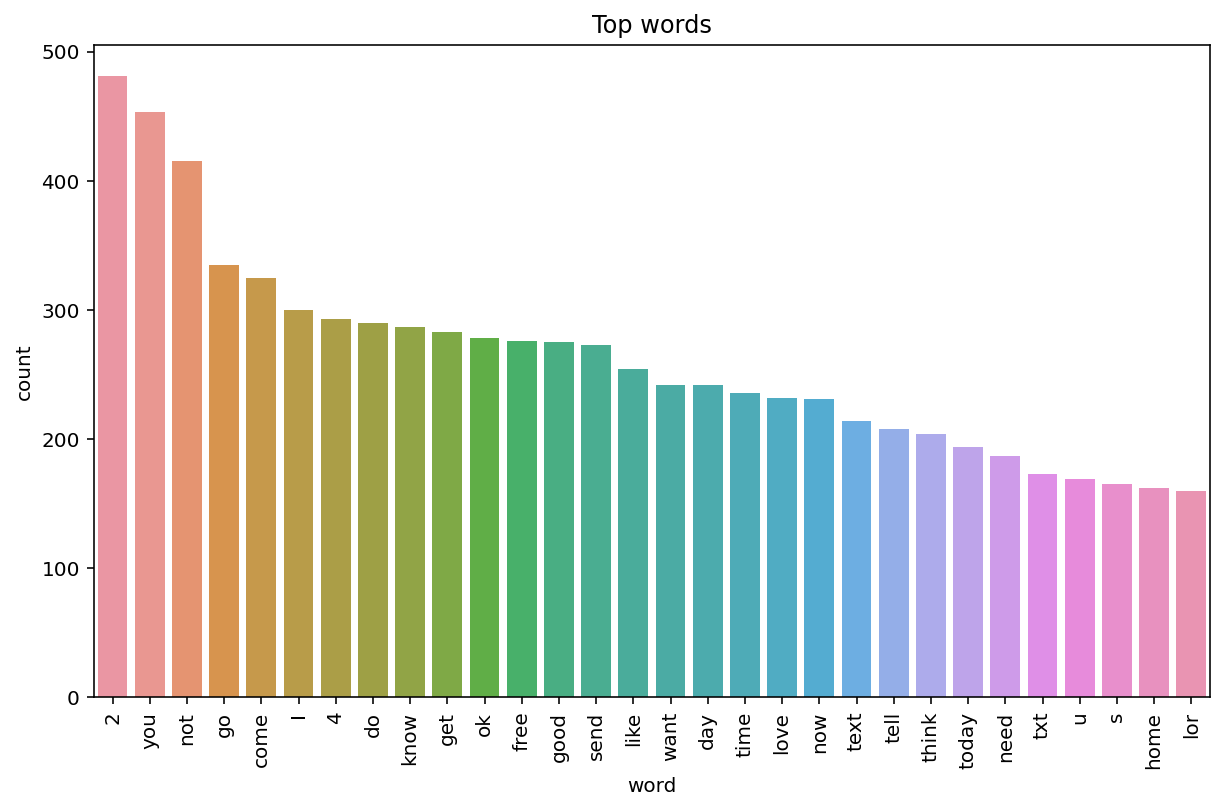

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

In [18]:
#!pip install wordcloud

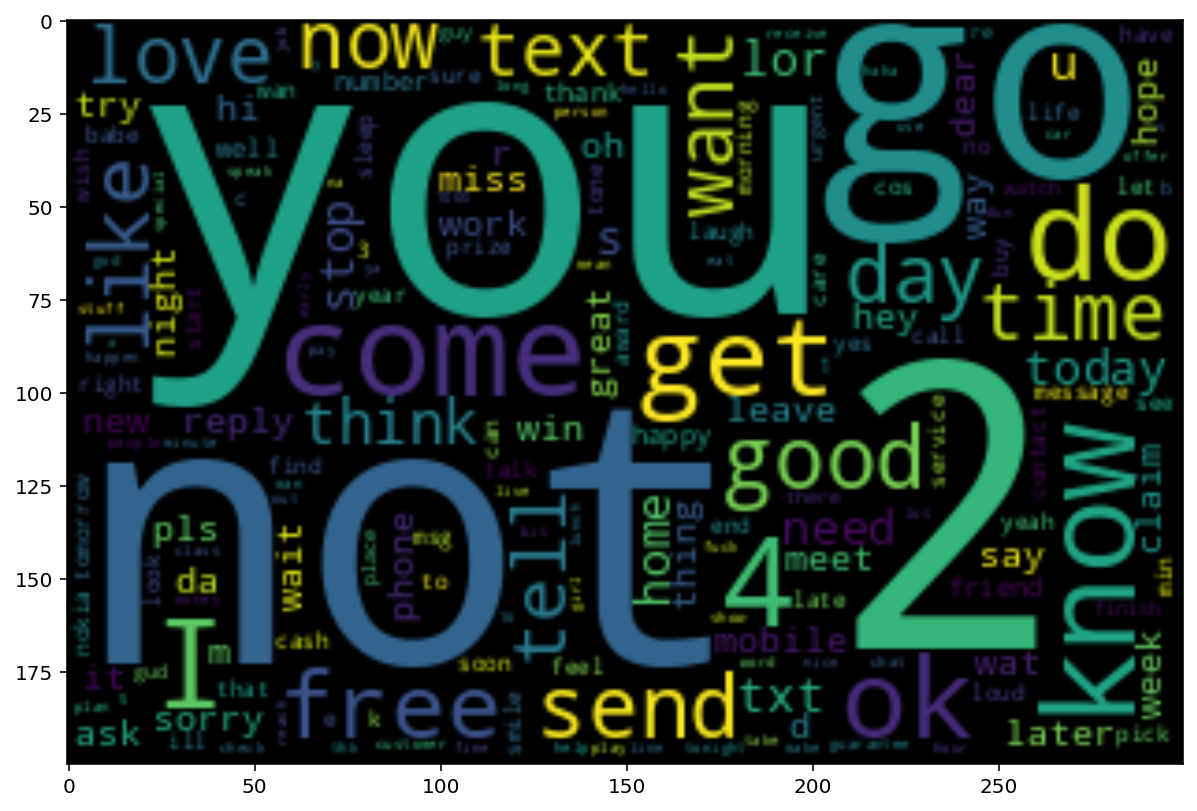

In [19]:
### Creating wordcloud
from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

### Module 2 
#### till now we have done all text cleaning and plotting part 

#### now lets split our data for some training and testing 

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(cleaned_df.Message, cleaned_df.Category, test_size = 0.2, stratify = cleaned_df.Category
                                                 ,random_state = 42)

### Using The tokenizer Class to convert the sentences into word vectors¶


In [21]:
from keras.preprocessing.text import Tokenizer
num_words = 10000 # this means 15000 unique words can be taken 
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([X_train, X_test], axis = 0)
tokenizer.fit_on_texts(df_total)


In [22]:
len(tokenizer.word_index) # this is whole unique words in our corpus
# but we have taken 10000 but we have only 8502 and the rest will be zero

8400

In [23]:
cleaned_df.word_length.max()

171

In [25]:
from keras_preprocessing.sequence import pad_sequences

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=171,padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 171, padding = 'post')


In [26]:
print(X_train_pad.shape,X_test_pad.shape) # this is our 2D matrix we can take this as Input data

(4457, 171) (1115, 171)


### Now lets design our Deep learning model to train our data

### Method1: by using solely embedding layers

In [36]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from keras.layers import CuDNNLSTM,CuDNNGRU
from keras.layers import Dropout

In [37]:
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 100 dimension
model = Sequential()
model.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1] # max_len of text sequence
                          ))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [38]:
#EarlyStopping and ModelCheckpoint

from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
mc = ModelCheckpoint('../model_files/model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [39]:
history_embedding = model.fit(X_train_pad,y_train, epochs = 35, batch_size = 120, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc]  )


Epoch 1/35
38/38 [==============================] - ETA: 0s - loss: 0.2971 - accuracy: 0.9022
Epoch 1: val_accuracy improved from -inf to 0.97220, saving model to ../model_files/model.h5
38/38 [==============================] - 7s 122ms/step - loss: 0.2971 - accuracy: 0.9022 - val_loss: 0.0987 - val_accuracy: 0.9722
Epoch 2/35
37/38 [============================>.] - ETA: 0s - loss: 0.0438 - accuracy: 0.9885
Epoch 2: val_accuracy improved from 0.97220 to 0.98565, saving model to ../model_files/model.h5
38/38 [==============================] - 4s 106ms/step - loss: 0.0437 - accuracy: 0.9886 - val_loss: 0.0688 - val_accuracy: 0.9857
Epoch 3/35
38/38 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9960
Epoch 3: val_accuracy did not improve from 0.98565
38/38 [==============================] - 4s 106ms/step - loss: 0.0174 - accuracy: 0.9960 - val_loss: 0.0629 - val_accuracy: 0.9857
Epoch 4/35
38/38 [==============================] - ETA: 0s - loss: 0.0048 - accuracy

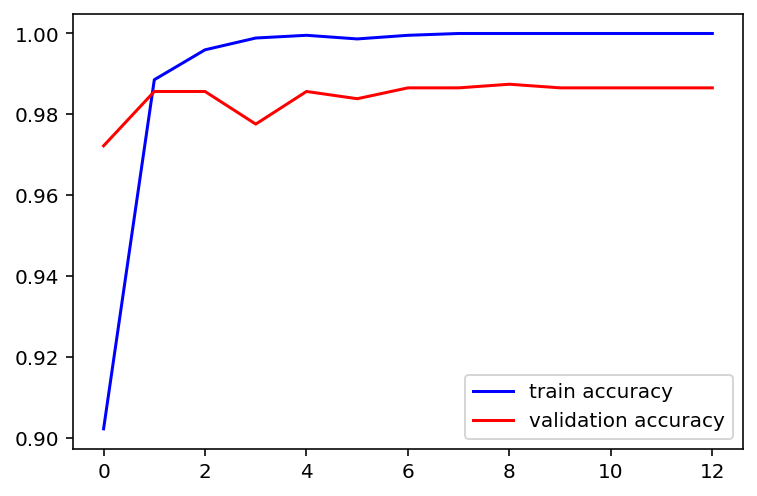

In [40]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()


#### the maximum accurary we have got with wordembedding is 98 with some overfitting  now we would try with word2vec

### Method 2: Using word2vec **i'm gonna use gensim **

In [41]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') # this would download vector with 100 dimension

In [42]:
glove_gensim['cat'].shape[0] # this is the diemnsion of the vectors

100

In [46]:
# now lets connvert all the words we have in our data into vectors 
vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.index_to_key:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [47]:
gensim_weight_matrix.shape

(10000, 100)

In [48]:
# designing our architecture 
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 100 dimension
model_gensim = Sequential()
model_gensim.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1], # max_len of text sequence
                          weights = [gensim_weight_matrix],trainable = False))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
model_gensim.add(Dense(1, activation = 'sigmoid'))
model_gensim.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [49]:
model_gensim.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 171, 100)          1000000   
                                                                 
 dropout_6 (Dropout)         (None, 171, 100)          0         
                                                                 
 bidirectional_6 (Bidirectio  (None, 171, 200)         161600    
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 171, 200)          0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 171, 400)         643200    
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 171, 400)         

In [50]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('../model_files/model_gensim.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [51]:
history_gensim = model_gensim.fit(X_train_pad,y_train, epochs = 25, batch_size = 120, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc]  )


Epoch 1/25
37/38 [============================>.] - ETA: 0s - loss: 0.2347 - accuracy: 0.9198
Epoch 1: val_accuracy improved from -inf to 0.93991, saving model to ../model_files/model_gensim.h5
38/38 [==============================] - 7s 120ms/step - loss: 0.2340 - accuracy: 0.9201 - val_loss: 0.1579 - val_accuracy: 0.9399
Epoch 2/25
37/38 [============================>.] - ETA: 0s - loss: 0.1225 - accuracy: 0.9613
Epoch 2: val_accuracy improved from 0.93991 to 0.95695, saving model to ../model_files/model_gensim.h5
38/38 [==============================] - 4s 104ms/step - loss: 0.1230 - accuracy: 0.9610 - val_loss: 0.1226 - val_accuracy: 0.9570
Epoch 3/25
37/38 [============================>.] - ETA: 0s - loss: 0.1039 - accuracy: 0.9664
Epoch 3: val_accuracy improved from 0.95695 to 0.96592, saving model to ../model_files/model_gensim.h5
38/38 [==============================] - 4s 107ms/step - loss: 0.1035 - accuracy: 0.9666 - val_loss: 0.1057 - val_accuracy: 0.9659
Epoch 4/25
37/38 [=

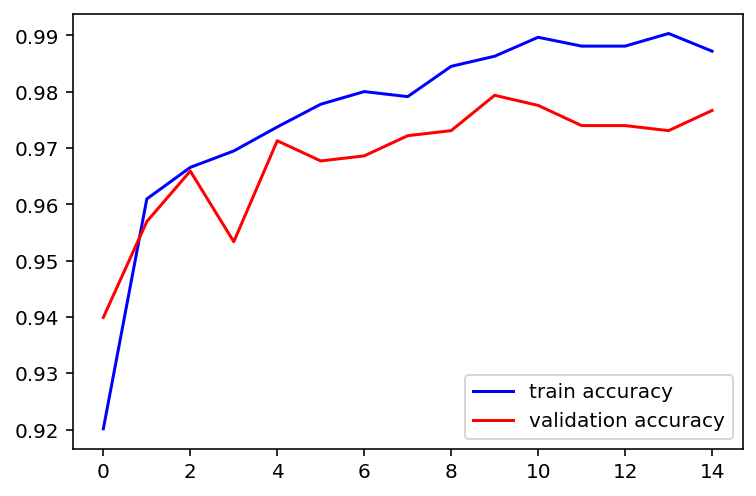

In [52]:
# lets draw learning curve 

plt.plot(history_gensim.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_gensim.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()


### **model trained with word2vec is more generalised model so we will choose that as our final model **

In [53]:
model_gensim.evaluate(X_test_pad, y_test) 


35/35 [==============================] - 1s 25ms/step - loss: 0.0774 - accuracy: 0.9767


[0.07743137329816818, 0.9766815900802612]

In [54]:
model.evaluate(X_test_pad, y_test)

35/35 [==============================] - 1s 21ms/step - loss: 0.1033 - accuracy: 0.9865


[0.1032889261841774, 0.9865471124649048]

### Model Evaluation

In [55]:
y_pred = np.where(model.predict(X_test_pad)>.5,1,0)

35/35 [==============================] - 1s 21ms/step


In [56]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       975
           1       0.92      0.98      0.95       140

    accuracy                           0.99      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [57]:
y_pred_gensim = np.where(model_gensim.predict(X_test_pad)>0.5,1,0)
print(metrics.classification_report(y_pred_gensim, y_test))

35/35 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       972
           1       0.89      0.93      0.91       143

    accuracy                           0.98      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### Now lets test our model with real data

In [58]:
def predict(sentence):
    sentence_lst=[]
    sentence_lst.append(sentence)
    sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
    sentence_padded=pad_sequences(sentence_seq,maxlen=171,padding='post')
    probability = (model_gensim.predict(sentence_padded))[0][0]
    if probability > 0.5:
        print(f'Spam | {np.round(probability*100,2)}%')
    else:
        print(f'Normal | {100 - (np.round(probability*100,2))}%')


In [ ]:
#predict(str(input('Enter the Sentence:')))

In [ ]:
#predict(str(input('Enter the Sentence:')))

In [68]:
predict('free entry in 2 a weekly comp to win FA Cup final')

1/1 [==============================] - 0s 17ms/step
Spam | 99.58%
